In [34]:
%matplotlib inline
import numpy as np
import dicom
import glob
from matplotlib import pyplot as plt
import os
import pandas as pd
from keras.models import Sequential,load_model,Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, merge, UpSampling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [35]:
img_rows = 512
img_cols = 512
def get_masks(scans,masks_list):
    %matplotlib inline
    scans1=scans.copy()
    maxv=255
    masks=np.zeros(shape=(img_rows,img_cols))
    for i_m in range(len(masks_list)):
        for i in range(-masks_list[i_m][3],masks_list[i_m][3]+1):
            for j in range(-masks_list[i_m][3],masks_list[i_m][3]+1):
                masks[masks_list[i_m][2]+i,masks_list[i_m][1]+j]=1
        for i1 in range(-masks_list[i_m][3],masks_list[i_m][3]+1):
            scans[masks_list[i_m][2]+i1,(masks_list[i_m][1]+masks_list[i_m][3])]=maxv=255
            scans[masks_list[i_m][2]+i1,masks_list[i_m][1]-masks_list[i_m][3]]=maxv=255
            scans[masks_list[i_m][2]+masks_list[i_m][3],masks_list[i_m][1]+i1]=maxv=255
            scans[masks_list[i_m][2]-masks_list[i_m][3],masks_list[i_m][1]+i1]=maxv=255
   
    f, ax = plt.subplots(1, 2,figsize=(10,5))
    ax[0].imshow(scans[:,:],cmap=plt.cm.gray)
    ax[1].imshow(masks[:,:],cmap=plt.cm.gray)
    plt.show()
    return(masks)

(512, 512)


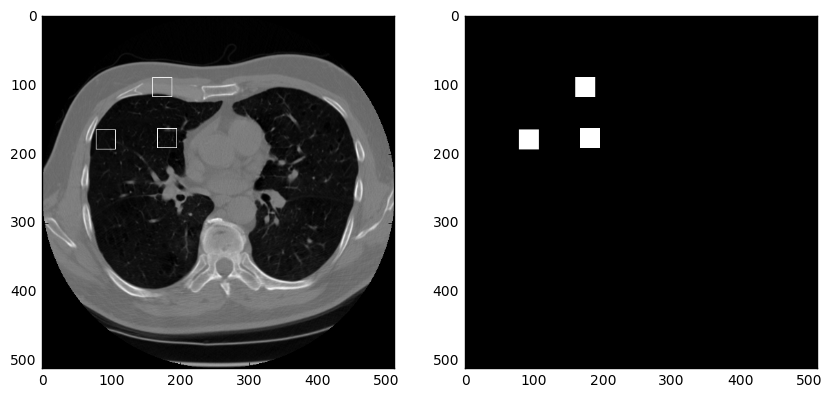

In [33]:
slices = dicom.read_file("0_group/0a0c32c9e08cc2ea76a71649de56be6d/37434a1fb0c9b7d5a1b073fcaff85109.dcm")
scans = np.stack(slices.pixel_array)
scans = 255.0 / np.amax(scans) * scans
scans =scans.astype(np.uint8)
print(scans.shape)
plt.imshow(scans, cmap=plt.cm.gray)
# Set up masks list in the format [[0,x_coordinate,y_coordinate, size],]
masks_list=[[0,92,180,14],[0,174,104,14],[0,181,178,14]]
masks=get_masks(scans,masks_list)
